# 4.1 The NumPy ndarray: A Multidimensional Array Object

NumPy internally stores data in a contiguous block of memory, independent of other built-in python objects. NumPy's library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in python sequences

NumPy operations perform complex computations on entire arrays without the need for python for loops

While NumPy by itself does not provide modeling or scientific functionality, having an understanding of NumPy arrays and array-oriented computing will help use tools with array-oriented semantics, like pandas, much more effectively

In [1]:
import numpy as np

my_arr = np.arange(1000000)

my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 8.88 ms, sys: 2.92 ms, total: 11.8 ms
Wall time: 10.4 ms


In [5]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 511 ms, sys: 117 ms, total: 628 ms
Wall time: 629 ms


NumPy-based algorithms are generally 10 to 100 times faster or more than their pure python counterparts and use significant less memory

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large datasets in python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements

In [6]:
import numpy as np

# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.19410859, -0.16578042,  0.83957644],
       [-0.78451947,  1.30022712,  0.21621118]])

In [7]:
type(data)

numpy.ndarray

In [8]:
data * 10

array([[-1.94108591, -1.65780415,  8.39576439],
       [-7.8451947 , 13.00227117,  2.16211184]])

In [9]:
data + data

array([[-0.38821718, -0.33156083,  1.67915288],
       [-1.56903894,  2.60045423,  0.43242237]])

An ndarray is a generic multidimensional container for homogeneous data, that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

## 4.1.1 Creating ndarrays

In [13]:
# Convert a list to array

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array

In [14]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [15]:
arr2.ndim

2

In [16]:
arr2.shape

(2, 4)

In [17]:
arr1.dtype

dtype('float64')

In [18]:
arr2.dtype

dtype('int64')

In [20]:
np.zeros(shape = 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [22]:
np.empty((2,3,2))

array([[[2.31584178e+077, 2.31584178e+077],
        [2.96439388e-323, 0.00000000e+000],
        [2.44029516e-312, 6.82116729e-043]],

       [[6.19413587e-091, 5.39744832e-062],
        [2.34178652e-057, 1.76110080e-076],
        [3.99910963e+252, 8.38745314e-309]]])

arange is an array-valued version of the built-in python range function

In [25]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 4.1.2 Data Types for ndarrays

The data type or dtype is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data

In [26]:
arr1 = np.array([1, 2, 3], dtype = np.float64)
arr2 = np.array([1, 2, 3], dtype = np.int32)

In [27]:
arr1.dtype

dtype('float64')

In [28]:
arr2.dtype

dtype('int32')

dtypes are a source of NumPy's flexibility for interacting with data coming from other systems. In most cases they provide a mapping directly onto an underlying disk or memory representation, which makes it easy to read and write binary streams of data to disk and also to connect to code written in a low-level language like C or Fortran

Explicitly convert or cast an array from one dtype to another using astype method

In [29]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [30]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [31]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.dtype

dtype('float64')

In [32]:
arr.astype(np.int32).dtype

dtype('int32')

In [33]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype = np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [34]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [35]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype = np.float64)

In [36]:
int_array.dtype

dtype('int64')

In [37]:
calibers.dtype

dtype('float64')

In [38]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [39]:
empty_uint32 = np.empty(8, dtype = 'u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype

## 4.1.3 Arithmetic with NumPy Arrays

**Vectorization**: Arrays are important because they enable you to express batch operations on data without writing any for loops. This is called vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise

In [40]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [41]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [42]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [43]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [44]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [45]:
arr2 = np.array([[0.,4.,1.],[7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [46]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

**Broadcasting:** Operations between differently sized arrays is called broadcasting

## 4.1.4 Basic Indexing and Slicing

One-dimensional arrays are simple, on the surface they act similarly to python lists

In [47]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
arr[5]

5

In [49]:
arr[5:8]

array([5, 6, 7])

If you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propagated (or broadcasted henceforth) to the entire selection. An important first distinction from python's built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array

In [50]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [51]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [52]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [53]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array 

In [54]:
arr[5:8].copy()

array([64, 64, 64])

In [64]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [65]:
arr2d.ndim

2

In [66]:
arr2d.shape

(3, 3)

In [67]:
arr2d[0]

array([1, 2, 3])

Individual elements can be accessed recursively

In [68]:
arr2d[0][2]

3

In [69]:
arr2d[0,2]

3

In [70]:
arr2d[0][2] == arr2d[0, 2]

True

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions 

In [71]:
arr3d = np.array([[[1, 2, 3],[4, 5, 6]],
                  [[7, 8, 9],[10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [72]:
arr3d.shape

(2, 2, 3)

In [73]:
arr3d.ndim

3

In [74]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [75]:
arr3d[0][0]

array([1, 2, 3])

In [76]:
arr3d[0][0][0]

1

In [77]:
arr3d[0,0,0]

1

In [78]:
arr3d[0][0][0] == arr3d[0,0,0]

True

In [79]:
old_values = arr3d[0].copy()
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [80]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [81]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [82]:
arr3d[1][0]

array([7, 8, 9])

In [83]:
arr3d[1,0]

array([7, 8, 9])

In [84]:
arr3d[1][0] == arr3d[1,0]

array([ True,  True,  True])

In [85]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [86]:
x[0]

array([7, 8, 9])

In all of these cases where subsections of the array have been selected, the returned arrays are views

### Indexing with slices

In [87]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [88]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [89]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [90]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

In [93]:
arr2d[:2][1:]

array([[4, 5, 6]])

In [95]:
arr2d[1,:2]

array([4, 5])

In [96]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

In [97]:
arr2d[:2,1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## 4.1.5 Boolean Indexing

In [99]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)

In [100]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [101]:
data

array([[-0.7567591 ,  0.45100829, -0.63333439,  1.76155869],
       [-1.21030231,  1.12808316,  0.32417611, -0.02221228],
       [-1.5311372 ,  1.13735142,  0.45502038,  1.13318337],
       [ 0.12484547, -1.27887995,  1.28482774,  0.04694638],
       [ 0.45511147, -1.63235942,  0.79067059, -0.35520458],
       [ 1.14366761, -0.06428092,  0.14282422,  0.46792075],
       [-0.30643068,  0.55052883, -1.35858456, -1.33270919]])

In [102]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [105]:
data[[0,3]]

array([[-0.7567591 ,  0.45100829, -0.63333439,  1.76155869],
       [ 0.12484547, -1.27887995,  1.28482774,  0.04694638]])

In [103]:
data[names == 'Bob']

array([[-0.7567591 ,  0.45100829, -0.63333439,  1.76155869],
       [ 0.12484547, -1.27887995,  1.28482774,  0.04694638]])

In [106]:
data[[0,3]] == data[names == 'Bob']

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [107]:
data[names == 'Bob',2:]

array([[-0.63333439,  1.76155869],
       [ 1.28482774,  0.04694638]])

In [108]:
data[names == 'Bob',3]   

array([1.76155869, 0.04694638])

In [109]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [110]:
~(names == 'Bob')

array([False,  True,  True, False,  True,  True,  True])

In [111]:
data[~(names == 'Bob')]

array([[-1.21030231,  1.12808316,  0.32417611, -0.02221228],
       [-1.5311372 ,  1.13735142,  0.45502038,  1.13318337],
       [ 0.45511147, -1.63235942,  0.79067059, -0.35520458],
       [ 1.14366761, -0.06428092,  0.14282422,  0.46792075],
       [-0.30643068,  0.55052883, -1.35858456, -1.33270919]])

In [112]:
data[(names != 'Bob')]

array([[-1.21030231,  1.12808316,  0.32417611, -0.02221228],
       [-1.5311372 ,  1.13735142,  0.45502038,  1.13318337],
       [ 0.45511147, -1.63235942,  0.79067059, -0.35520458],
       [ 1.14366761, -0.06428092,  0.14282422,  0.46792075],
       [-0.30643068,  0.55052883, -1.35858456, -1.33270919]])

In [113]:
data[[False,  True,  True, False,  True,  True,  True]]

array([[-1.21030231,  1.12808316,  0.32417611, -0.02221228],
       [-1.5311372 ,  1.13735142,  0.45502038,  1.13318337],
       [ 0.45511147, -1.63235942,  0.79067059, -0.35520458],
       [ 1.14366761, -0.06428092,  0.14282422,  0.46792075],
       [-0.30643068,  0.55052883, -1.35858456, -1.33270919]])

In [114]:
data[:,[True, True, False, False]]

array([[-0.7567591 ,  0.45100829],
       [-1.21030231,  1.12808316],
       [-1.5311372 ,  1.13735142],
       [ 0.12484547, -1.27887995],
       [ 0.45511147, -1.63235942],
       [ 1.14366761, -0.06428092],
       [-0.30643068,  0.55052883]])

In [115]:
cond = names == 'Bob'
data[~cond]

array([[-1.21030231,  1.12808316,  0.32417611, -0.02221228],
       [-1.5311372 ,  1.13735142,  0.45502038,  1.13318337],
       [ 0.45511147, -1.63235942,  0.79067059, -0.35520458],
       [ 1.14366761, -0.06428092,  0.14282422,  0.46792075],
       [-0.30643068,  0.55052883, -1.35858456, -1.33270919]])

In [116]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [117]:
data[mask]

array([[-0.7567591 ,  0.45100829, -0.63333439,  1.76155869],
       [-1.5311372 ,  1.13735142,  0.45502038,  1.13318337],
       [ 0.12484547, -1.27887995,  1.28482774,  0.04694638],
       [ 0.45511147, -1.63235942,  0.79067059, -0.35520458]])

Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged

In [118]:
data[data < 0] = 0
data

array([[0.        , 0.45100829, 0.        , 1.76155869],
       [0.        , 1.12808316, 0.32417611, 0.        ],
       [0.        , 1.13735142, 0.45502038, 1.13318337],
       [0.12484547, 0.        , 1.28482774, 0.04694638],
       [0.45511147, 0.        , 0.79067059, 0.        ],
       [1.14366761, 0.        , 0.14282422, 0.46792075],
       [0.        , 0.55052883, 0.        , 0.        ]])

In [119]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.12808316, 0.32417611, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [1.14366761, 0.        , 0.14282422, 0.46792075],
       [0.        , 0.55052883, 0.        , 0.        ]])

## 4.1.6 Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays

In [120]:
arr = np.empty((8,4))
arr.shape

(8, 4)

In [121]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [122]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [123]:
arr[[4, 3, 0, 6],:]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [124]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [125]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [126]:
arr[[1,5,7,2],[0,3,1,2]] # The elements (1,0),(5,3),(7,1),(2,2) are selected

array([ 4, 23, 29, 10])

In [129]:
arr[[1,5,7,2],:]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [130]:
arr[:,[0,3,1,2]]

array([[ 0,  3,  1,  2],
       [ 4,  7,  5,  6],
       [ 8, 11,  9, 10],
       [12, 15, 13, 14],
       [16, 19, 17, 18],
       [20, 23, 21, 22],
       [24, 27, 25, 26],
       [28, 31, 29, 30]])

In [131]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

The fancy indexing, unlike slicing, always copies the data into a new array

## 4.1.7 Transposing Arrays and Swapping Axes

In [133]:
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [134]:
arr.shape

(3, 5)

In [135]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [136]:
arr.T.shape

(5, 3)

In [137]:
arr = np.random.randn(6,3)
arr

array([[-1.16128266, -0.42826445, -0.33494627],
       [ 0.69192375, -0.98030748, -0.73188547],
       [-0.55780001,  0.99103562, -1.04627783],
       [ 1.27987823, -0.61991506,  0.98098712],
       [ 0.08192487, -2.14777792, -0.18087916],
       [-0.55076046,  0.39724035, -0.24611316]])

Compute the inner matrix product 

In [138]:
np.dot(arr.T, arr)

array([[ 4.08661378, -1.92191811,  1.8424471 ],
       [-1.92191811,  7.28160934, -0.49338671],
       [ 1.8424471 , -0.49338671,  2.79816733]])

In [145]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [146]:
arr.shape

(2, 2, 4)

In [147]:
arr.ndim

3

In [148]:
arr.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [149]:
arr.T.shape

(4, 2, 2)

In [150]:
arr.transpose(0,1,2)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [151]:
arr.transpose(0,1,2).shape

(2, 2, 4)

In [154]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [156]:
arr.transpose((1,0,2)).shape

(2, 2, 4)

In [157]:
arr.transpose(2,1,0)

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [158]:
arr.transpose(2,1,0) == arr.T

array([[[ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True]]])

Simple transposing with .T is a special case of swapping axes

In [159]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [160]:
arr.swapaxes(1,2).shape

(2, 4, 2)

In [161]:
arr.swapaxes(0,1).shape

(2, 2, 4)

swapaxes similarly returns a view on the data without making a copy

# 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results

In [185]:
import numpy as np 

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [186]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [187]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others such as add or maximum, take two arrays (thus, binary ufuncs) and return a single array as the result

In [188]:
x = np.random.randn(8)
y = np.random.randn(8)

In [189]:
x

array([-0.04548451,  1.56698683,  1.47698461,  0.16194933,  0.81625432,
       -0.65335967,  0.66278988, -1.13468785])

In [190]:
y

array([ 0.33366391, -0.37356167, -1.16648792,  0.27305733, -0.8262483 ,
       -1.19814875, -1.21376508,  1.2561168 ])

Element-wise maximum. Compute the element-wise maximum of the elements in x and y

In [191]:
np.maximum(x,y)

array([ 0.33366391,  1.56698683,  1.47698461,  0.27305733,  0.81625432,
       -0.65335967,  0.66278988,  1.2561168 ])

In [192]:
arr = np.random.randn(7) * 5
arr

array([-9.53263699, -4.05699234, -4.11647379, -6.03209966,  3.05213876,
        5.84254938,  0.73193049])

In [193]:
remainder, whole_part = np.modf(arr)

In [194]:
remainder

array([-0.53263699, -0.05699234, -0.11647379, -0.03209966,  0.05213876,
        0.84254938,  0.73193049])

In [195]:
whole_part

array([-9., -4., -4., -6.,  3.,  5.,  0.])

In [196]:
np.modf(arr)

(array([-0.53263699, -0.05699234, -0.11647379, -0.03209966,  0.05213876,
         0.84254938,  0.73193049]),
 array([-9., -4., -4., -6.,  3.,  5.,  0.]))

In [197]:
arr

array([-9.53263699, -4.05699234, -4.11647379, -6.03209966,  3.05213876,
        5.84254938,  0.73193049])

In [198]:
np.sqrt(arr)

<ipython-input-198-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([       nan,        nan,        nan,        nan, 1.74703714,
       2.41713661, 0.85552936])

In [199]:
arr

array([-9.53263699, -4.05699234, -4.11647379, -6.03209966,  3.05213876,
        5.84254938,  0.73193049])

In [200]:
np.sqrt(arr, out = arr) # the second optional argument means 'out' that allows in-place operations 

<ipython-input-200-e3ca18b15869>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr,arr)


array([       nan,        nan,        nan,        nan, 1.74703714,
       2.41713661, 0.85552936])

In [201]:
arr

array([       nan,        nan,        nan,        nan, 1.74703714,
       2.41713661, 0.85552936])

In [204]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [205]:
np.square(arr, out = arr)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [206]:
arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

# 4.3 Array-Oriented Programming with Arrays 

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two or more orders of magnitude faster than their pure python equivalents, with the biggest impact in any kind of numerical computations. 

In [207]:
import numpy as np

points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [208]:
points.shape

(1000,)

np.meshgrid return coordinate matrices from coordinate vectors

In [209]:
xs, ys = np.meshgrid(points, points)

In [210]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [211]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [215]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [216]:
z.shape

(1000, 1000)

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

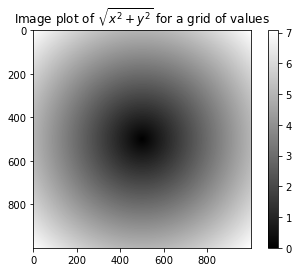

In [218]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

## 4.3.1 Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression: x if condition else y.

In [219]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [220]:
# take a value from xarr whenever the corresponsing value in cond is True, otherwise, take the value from yarr

result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

The list comprehension has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted python code). Second, it will not work with multidimensional arrays

In [221]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [227]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5] * 1000000)
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5] * 1000000)
cond = np.array([True, False, True, True, False] * 1000000)

In [228]:
%%time 
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

CPU times: user 842 ms, sys: 59.6 ms, total: 901 ms
Wall time: 906 ms


In [229]:
%%time 
result = np.where(cond, xarr, yarr)

CPU times: user 306 ms, sys: 34.7 ms, total: 341 ms
Wall time: 341 ms


A typical use of np.where in data analysis is to produce a new array of values based on another array

In [230]:
arr = np.random.randn(4,4)
arr

array([[ 1.25722675,  0.28739359, -0.17072334, -0.82330274],
       [-1.34443689,  1.20741267,  1.95471585,  0.44101279],
       [ 0.34803753,  0.34207948, -0.36091758, -2.54084211],
       [-0.48060491, -0.22033838,  1.74103423,  0.60535074]])

In [231]:
arr > 0

array([[ True,  True, False, False],
       [False,  True,  True,  True],
       [ True,  True, False, False],
       [False, False,  True,  True]])

In [232]:
# replace all positive values with 2 and all negative values with -2

np.where(arr > 0, 2, -2)

array([[ 2,  2, -2, -2],
       [-2,  2,  2,  2],
       [ 2,  2, -2, -2],
       [-2, -2,  2,  2]])

In [233]:
# set only positive values to 2

np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        , -0.17072334, -0.82330274],
       [-1.34443689,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -0.36091758, -2.54084211],
       [-0.48060491, -0.22033838,  2.        ,  2.        ]])

## 4.3.2 Mathematical and Statistical Methods

In [234]:
arr = np.random.randn(5,4)
arr

array([[ 0.90789599, -0.07855843,  0.22455113,  0.58384301],
       [-1.51747396,  1.22177343,  0.53737075,  0.43663091],
       [ 1.79253564,  0.20654774,  0.68158409, -0.62274491],
       [-0.24363788, -0.53209937, -0.48156937,  1.02857985],
       [-0.44704726,  1.08395081, -0.63202394,  0.63448689]])

In [235]:
arr.ndim

2

In [236]:
arr.shape

(5, 4)

In [239]:
arr.mean()

0.23922975647948683

In [241]:
np.mean(arr)

0.23922975647948683

In [242]:
arr.sum()

4.784595129589737

In [243]:
np.sum(arr)

4.784595129589737

In [244]:
arr.mean(axis = 0)

array([0.09845451, 0.38032284, 0.06598253, 0.41215915])

In [245]:
arr.mean(axis = 1) # compute means across the columns 

array([ 0.40943293,  0.16957528,  0.51448064, -0.05718169,  0.15984163])

In [246]:
arr.sum(axis = 0) # compute sum down the rows 

array([0.49227253, 1.90161419, 0.32991266, 2.06079574])

In [247]:
arr.sum(axis = 1)

array([ 1.63773171,  0.67830113,  2.05792256, -0.22872677,  0.6393665 ])

In [248]:
arr = np.array([0,1,2,3,4,5,6,7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [249]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [250]:
arr.shape

(3, 3)

In [251]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [252]:
arr.cumsum(axis = 1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

## 4.3.3 Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False). Thus, sum is often used as a means of counting True values in a boolean array

In [254]:
arr = np.random.randn(100)
arr.shape

(100,)

In [255]:
arr > 0

array([ True, False, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True])

In [256]:
(arr > 0).sum() # Number of positive values 

50

In [257]:
np.sum(arr > 0)

50

In [258]:
bools = np.array([False, False, True, False])

In [259]:
bools.any()

True

In [260]:
bools.all()

False

## 4.3.4 Sorting

Like python's built-in list type, Numpy arrays can be sorted in-place with the sort method

In [261]:
arr = np.random.randn(6)
arr

array([ 0.34945705, -0.26199999, -0.79869091,  0.46962861, -1.13391736,
        0.95831931])

In [262]:
arr.sort() # in-place 
arr

array([-1.13391736, -0.79869091, -0.26199999,  0.34945705,  0.46962861,
        0.95831931])

In [263]:
np.sort(arr) # copy 

array([-1.13391736, -0.79869091, -0.26199999,  0.34945705,  0.46962861,
        0.95831931])

In [265]:
arr = np.random.randn(5,3)
arr

array([[ 1.1315831 , -1.22858635, -0.90898087],
       [ 0.52348673,  1.27215312, -1.70578616],
       [-0.09201013, -1.40457327, -0.9978169 ],
       [-1.32773495,  1.90900412, -1.04861044],
       [-0.93293748, -0.46393158, -0.46902234]])

In [266]:
arr.sort(axis = 1)
arr

array([[-1.22858635, -0.90898087,  1.1315831 ],
       [-1.70578616,  0.52348673,  1.27215312],
       [-1.40457327, -0.9978169 , -0.09201013],
       [-1.32773495, -1.04861044,  1.90900412],
       [-0.93293748, -0.46902234, -0.46393158]])

In [267]:
arr.sort(axis = 0)
arr

array([[-1.70578616, -1.04861044, -0.46393158],
       [-1.40457327, -0.9978169 , -0.09201013],
       [-1.32773495, -0.90898087,  1.1315831 ],
       [-1.22858635, -0.46902234,  1.27215312],
       [-0.93293748,  0.52348673,  1.90900412]])

The top-level method np.sort returns a sorted copy of an array instead of modifying the array in-place.

In [268]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5744788847549465

## 4.3.5 Unique and Other Set Logic

In [269]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [275]:
# pure python alternative

sorted(set(names))

['Bob', 'Joe', 'Will']

In [272]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

In [276]:
sorted(set(ints))

[1, 2, 3, 4]

In [278]:
# test membership of the valuess in one array in another

values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

# 4.4 File Input and Ouyput with Arrays 

np.save and np.load are the two workhouse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy

In [279]:
arr = np.arange(10)
np.save('some_array',arr)

In [280]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [281]:
np.savez('array_archive.npz', a = arr, b = arr)

In [282]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [284]:
np.savez_compressed('arrays_compressed.npz', a = arr, b = arr)

# 4.5 Linear Algebra

Multiplying two two-dimensional arrays with * is an element-wise product instead of a matrix dot product. Thus, there is a function dot, both an array method and a function in the numpy namespace, for matrix multiplication

In [285]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6., 23.],[-1, 7],[8,9]])

In [286]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [287]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [289]:
try:
    x * y
except ValueError:
    print(f'{x.shape}, {y.shape}')

(2, 3), (3, 2)


In [290]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [291]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [292]:
y.dot(x)

array([[ 98., 127., 156.],
       [ 27.,  33.,  39.],
       [ 44.,  61.,  78.]])

In [293]:
np.dot(y, x)

array([[ 98., 127., 156.],
       [ 27.,  33.,  39.],
       [ 44.,  61.,  78.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array

In [294]:
np.dot(x, np.ones(3))

array([ 6., 15.])

The @ symbol also works as an infix operator that performs matrix multiplication

In [295]:
x @ np.ones(3)

array([ 6., 15.])

In [296]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
X

array([[ 0.66735798,  0.24440907, -1.80544688,  0.70441625,  0.86565074],
       [ 0.24268931,  2.00430159,  0.15164555, -1.33941148,  1.34297904],
       [ 1.0882038 , -1.41693646, -1.27514728, -0.59451125, -0.39985991],
       [-0.11072329, -1.37189231,  0.94710327, -0.47833105,  1.19595195],
       [ 1.72478491,  0.14666173,  0.26034317, -0.96413233,  0.19327426]])

In [297]:
mat = X.T.dot(X)
mat

array([[ 4.67559491, -0.48752436, -2.21152717, -2.11187094,  0.6694333 ],
       [-0.48752436,  7.98826777,  0.40833719, -1.1552168 ,  1.85751266],
       [-2.21152717,  0.40833719,  5.87341859, -1.42084669,  0.33365829],
       [-2.11187094, -1.1552168 , -1.42084669,  3.80202072, -1.70970479],
       [ 0.6694333 ,  1.85751266,  0.33365829, -1.70970479,  4.18048786]])

In [298]:
inv(mat) # compute the inverse of a matrix

array([[ 0.61495157,  0.08340692,  0.34857167,  0.5192184 ,  0.04899139],
       [ 0.08340692,  0.15194476,  0.04472808,  0.087295  , -0.04873831],
       [ 0.34857167,  0.04472808,  0.38576881,  0.37188233,  0.04560845],
       [ 0.5192184 ,  0.087295  ,  0.37188233,  0.79494099,  0.17349629],
       [ 0.04899139, -0.04873831,  0.04560845,  0.17349629,  0.32033231]])

In [299]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -8.00810600e-20, -1.27178329e-17,
         1.17562217e-17, -6.72744112e-17],
       [ 7.89474300e-17,  1.00000000e+00,  2.59629222e-17,
        -1.16113871e-16, -7.21870165e-17],
       [ 2.12477752e-16,  5.00950890e-17,  1.00000000e+00,
        -2.75456657e-18,  3.89127186e-17],
       [-1.91526304e-17,  5.56350540e-17, -1.45574384e-16,
         1.00000000e+00, -9.38264115e-19],
       [-6.33475115e-17, -8.86247976e-17, -4.29660861e-18,
        -1.98482932e-16,  1.00000000e+00]])

In [300]:
q, r = qr(mat)

In [301]:
r

array([[-5.64781905,  0.60091172,  3.59510412,  2.71657535, -1.39801851],
       [ 0.        , -8.28496382, -0.82549977,  2.17009464, -3.04511445],
       [ 0.        ,  0.        , -5.29891945,  3.4146565 , -1.4293669 ],
       [ 0.        ,  0.        ,  0.        , -1.20117053,  1.99354779],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.6767314 ]])

X.T.dot(X) computes the dot product of X with its transpose X.T

# 4.6 Pseudorandom Number Generation

The numpy.random module supplements the built-in python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions

In [302]:
samples = np.random.normal(size = (4, 4))
samples

array([[ 0.46563344, -0.31919678, -0.27180518,  0.7913034 ],
       [-0.92948036, -1.46593346, -0.95414945,  0.03225932],
       [-1.87254459,  1.07171952,  0.02207033, -0.26724778],
       [ 2.08074579, -0.11073308,  0.87253329,  0.73028631]])

Python's built-in random module, by contrast, only samples one value at a time. numpy.random is well over an order of magnitude faster for generating very large samples

In [303]:
from random import normalvariate 

N = 1000000

In [304]:
%timeit sample = [normalvariate(0, 1) for _ in range(N)]

545 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [305]:
%timeit np.random.normal(size = N)

18.8 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


These are pseudorandom numbers because they are generated by an algorithm with deterministic behavior based on the seed of the random number generator

The data generation functions in numpy.random use a global random seed

In [309]:
np.random.seed(1234)

In [314]:
# create a random number generator isolated from others 
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 4.7 Example: Random Walks

A pure Python way to implement a single random walk with 1,000 steps using the built-in random module

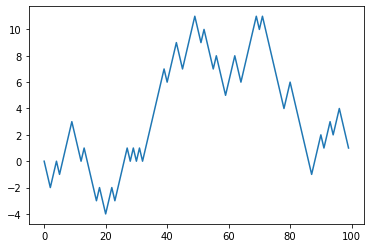

In [316]:
import random

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

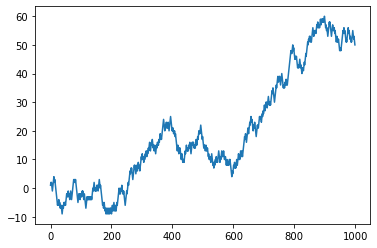

In [317]:
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk)

In [318]:
walk.min()

-9

In [319]:
walk.max()

60

In [321]:
(np.abs(walk) >= 10).argmax() # argmax returns indices of the maximum values along the given axis

297

## 4.7.1 Simulating Many Random Walks at Once

In [322]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size = (nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

In [325]:
walks.max()

122

In [326]:
walks.min()

-128

In [327]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [328]:
hits30.sum()

3368

In [329]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787

In [330]:
steps = np.random.normal(loc = 0, scale = 0.25, size = (nwalks, nsteps))
steps

array([[-0.20472197, -0.03407671, -0.24781626, ...,  0.22195392,
         0.21250584,  0.43994277],
       [-0.09066595,  0.04741116,  0.09872352, ...,  0.10684413,
         0.2540548 , -0.22255203],
       [ 0.00942324,  0.03418277, -0.42305453, ..., -0.05711872,
        -0.11820873, -0.71117832],
       ...,
       [ 0.1230118 , -0.18155722,  0.12782267, ...,  0.0730254 ,
         0.06546779,  0.47920034],
       [-0.20550269,  0.16459572, -0.03138668, ...,  0.06915243,
         0.07831634,  0.27554056],
       [-0.23056172,  0.28924403,  0.08444807, ..., -0.27018412,
        -0.02140732,  0.06343304]])

# 4.8 Conclusion